In [185]:
# Problem 1
# Starting here is the notebook used for convergence


import numpy as np
import pandas as pd
import os as os
import glob as glob
import csv as csv

import matplotlib.pyplot as plt

In [132]:
def matrix_factorization(M, U, V, R, steps=5000, t=0.0025, lmbda =0.25):
    '''
    M: Rating matrix
    U: User features
    V: Movie features
    R: Feature dimensions
    steps: Iterations
    t: Learning rate
    lmbda: Regularization parameter
    '''
    
    # Create Mask P_Omega
    Mask = mask_create(M)
    
    # Create phi_list
    phi_list = []
    
    isConverged = False
    phi_prev = -114514
    abc = True
    
    # Due to excessive calculation required
    # I set up an threshold of 0.1% change below which the phi is considered to be converged
    
    for step in range(steps):
        
        if(step % 500 == 1 and isConverged == False):
            print(step)
        
        if(isConverged == False):
            
            # Gradient Descent Method
            for i in range(len(M)):
                for j in range(len(M[i])):

                    if Mask[i][j] > 0:

                        # Calculate Error here to save calculation
                        e_ij=np.dot(U[i,:],V[:,j])-M[i][j] 

                        for k in range(R):
                            # Gradient Descent
                            U_temp=U[i][k]-t*(2*e_ij*V[k][j]+lmbda*U[i][k])
                            V_temp=V[k][j]-t*(2*e_ij*U[i][k]+lmbda*V[k][j])

                            U[i][k]=U_temp
                            V[k][j]=V_temp
            #Endfor
            
            # Calculate Phi
            # P_Omega is applied by doing Hadamard Product btn Mask and UV-M

            phi = 0.5 * (np.linalg.norm(np.multiply(Mask, (np.matmul(U,V)-M) ))**2)
            phi = phi + lmbda * (np.linalg.norm(U)**2) + lmbda * (np.linalg.norm(V)**2)
            
            
            if(abs((phi-phi_prev)/phi) > 0.00001):
                phi_prev = phi
                phi_list.append(phi_prev)
            else:
                isConverged = True
                
                print("Steps",step,phi,phi_prev,abs((phi-phi_prev)/phi))
                
                phi_prev = phi
                phi_list.append(phi_prev)
            #Endif
            
        else:
            phi_list.append(phi_prev)
    
    #Endfor

    return U, V, phi_list

In [122]:
def input_converter(users, movies, df):
    M = np.zeros([users, movies])
    for index, row in df.iterrows():
        M[int(row['user_id'])-1][int(row['movie_id'])-1] = row['ratings']
    #Endfor
    return M

In [123]:
def mask_create(M):
    
    Mask = np.zeros([len(M), len(M[0])], dtype=int)
    for i in range(len(M)):
        for j in range(len(M[i])):
            if(M[i][j] != 0):
                Mask[i][j] = 1
    #Endfor
    return Mask

In [5]:
# Code for sumbission starts here

'''
WARNING !!!!!!!!!!!!!!!!! RUNNING THIS WILL CLEAR CACHE

'''

# Read Data and Initialize Matrix
# 100,000 ratings (1-5) from 943 users on 1682 movies.
# 95,000 training
# 5,000 test

#Read
cwd = os.getcwd()
df_train = pd.read_csv(cwd + "\\Prob1_ratings.csv", header=None, names=["user_id","movie_id","ratings"])
df_test = pd.read_csv(cwd + "\\Prob1_ratings_test.csv", header=None, names=["user_id","movie_id","ratings"])

# Init
num_users = 943
num_movies = 1682
R = 10

M_train = input_converter(num_users, num_movies , df_train)
M_test = input_converter(num_users, num_movies , df_test)

obj_list = []
M_predicted_list = []
U_list = []
V_list = []

In [133]:
# Run by execute this

for codeRun in range(0,1):
    
    U = np.random.normal(0,1,(num_users,R))
    V = np.random.normal(0,1,(R,num_movies))
    
    rtnU, rtnV, obj_temp = matrix_factorization(M_train, U, V, R)
    
    obj_list.append(obj_temp)
    M_predicted_list.append(np.dot(rtnU, rtnV))
    U_list.append(rtnU)
    V_list.append(rtnV)

1
501
Steps 979 31617.898329609772 31618.214005623417 9.984092249065765e-06


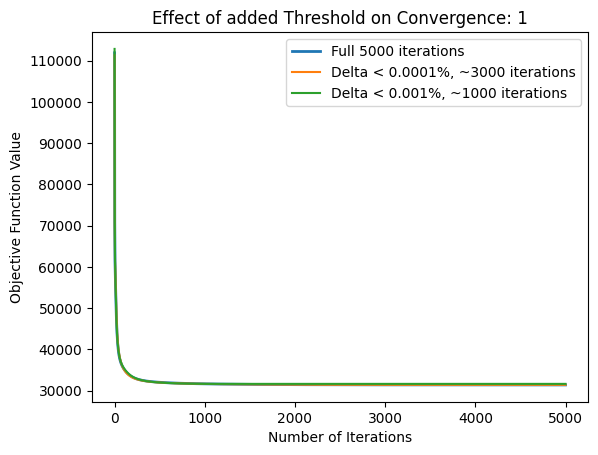

In [194]:
plt.plot(obj_list[0],label="Full 5000 iterations",linewidth=2.0)
plt.plot(obj_list[2],label="Delta < 0.0001%, ~3000 iterations")
plt.plot(obj_list[3],label="Delta < 0.001%, ~1000 iterations")

plt.title("Effect of added Threshold on Convergence: 1")
plt.xlabel("Number of Iterations")
plt.ylabel("Objective Function Value")
plt.legend()
plt.show()


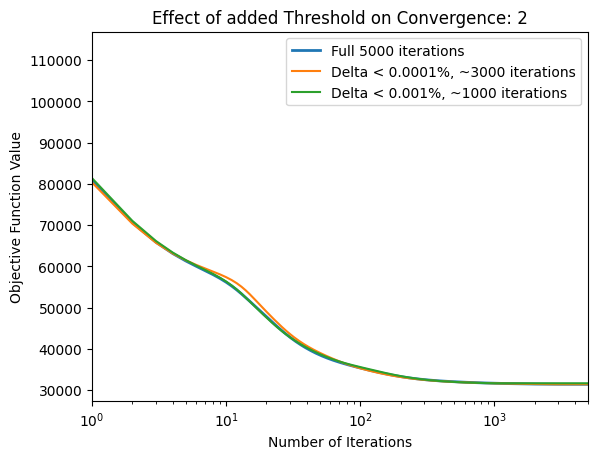

In [195]:
plt.plot(obj_list[0],label="Full 5000 iterations",linewidth=2.0)
plt.plot(obj_list[2],label="Delta < 0.0001%, ~3000 iterations")
plt.plot(obj_list[3],label="Delta < 0.001%, ~1000 iterations")

plt.title("Effect of added Threshold on Convergence: 2")
plt.xlabel("Number of Iterations")
plt.ylabel("Objective Function Value")
plt.xscale("log")
plt.xlim(1,5000)
plt.legend()
plt.show()

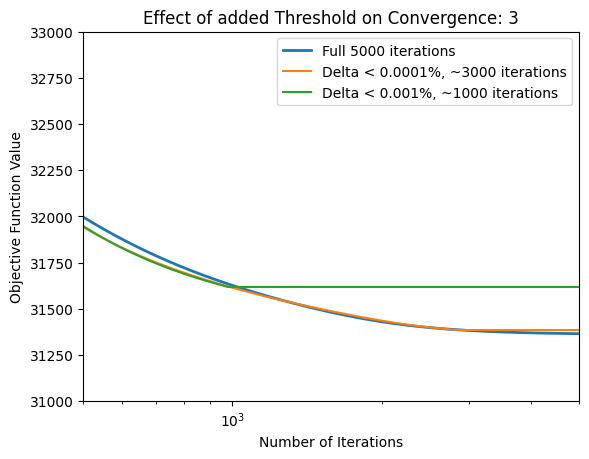

In [196]:
plt.plot(obj_list[0],label="Full 5000 iterations",linewidth=2.0)
plt.plot(obj_list[2],label="Delta < 0.0001%, ~3000 iterations")
plt.plot(obj_list[3],label="Delta < 0.001%, ~1000 iterations")

plt.title("Effect of added Threshold on Convergence: 3")
plt.xlabel("Number of Iterations")
plt.ylabel("Objective Function Value")
plt.xscale("log")
plt.xlim(500,5000)
plt.ylim(31000,33000)
plt.legend()
plt.show()

In [86]:
def write_file(path, lst):
    outfile = open(cwd + path,'a')
    out = csv.writer(outfile)
    out.writerows(map(lambda x: [x], lst))
    outfile.close()

In [96]:
def check_duplicate(identifier):
    
    for file in glob.glob("*.csv"):
        if file == identifier + "0" "Obj.csv":
            return True
    
    return False

In [90]:
# Save file to local
def save_local(identifier):
    if(check_duplicate(identifier) == False):
        for i in range(len(obj_list)):
            write_file("\\" + identifier + str(i) + "Obj.csv",obj_list[i])
            np.save(identifier + str(i) + "M_predicted", M_predicted_list[i])
            np.save(identifier + str(i) + "U", U_list[i])
            np.save(identifier + str(i) + "V", V_list[i])
    else:
        assert check_duplicate(identifier) == False

In [113]:
def RMSE_M(M_original, M_predicted):
    
    Mask = mask_create(M_original)
    M_toCompare = np.multiply(Mask, M_predicted)
    
    print("Total Error:", np.linalg.norm(matrix_minus(M_toCompare,M_original)))
    print("Total Number of", np.linalg.norm(Mask)**2)
    
    return np.linalg.norm(matrix_minus(M_toCompare,M_original)) / np.linalg.norm(Mask)**2

In [114]:
def matrix_minus(A,B):
    
    assert len(A) == len(B)
    assert len(A[0]) == len(B[0])
    
    result = np.zeros([len(A),len(A[0])])

    for i in range(len(A)):
        for j in range(len(A[0])):
            result[i][j] = A[i][j] - B[i][j]
    
    return result

In [176]:
def matrix_max_diff(A,B):
    
    assert len(A) == len(B)
    assert len(A[0]) == len(B[0])
    
    result = -114514

    for i in range(len(A)):
        for j in range(len(A[0])):
            result = max(result, abs(A[i][j] - B[i][j]))
    
    print("Max diff is", result)

In [181]:
print(RMSE_M(M_test,M_predicted_list[0])) # Full 5000 iter
matrix_max_diff(M_test,M_predicted_list[0])

Total Error: 65.39347765083058
Total Number of 5000.0
0.013078695530166115
Max diff is 5.086870688038089


In [182]:
print(RMSE_M(M_test,M_predicted_list[1])) # 3000 iter run 1
matrix_max_diff(M_test,M_predicted_list[1])

Total Error: 65.66155431782917
Total Number of 5000.0
0.013132310863565835
Max diff is 6.2091658306190105


In [183]:
print(RMSE_M(M_test,M_predicted_list[2]))   # 3000 iter run 2
matrix_max_diff(M_test,M_predicted_list[2])

Total Error: 65.5496412634229
Total Number of 5000.0
0.01310992825268458
Max diff is 6.1986648921927285


In [184]:
print(RMSE_M(M_test,M_predicted_list[3]))   # 1000 iter
matrix_max_diff(M_test,M_predicted_list[3])

Total Error: 65.43435435486398
Total Number of 5000.0
0.013086870870972796
Max diff is 4.849970449499994


In [197]:
for i in range(len(M_predicted_list)):
    print("Converged at : ", obj_list[i][-1])

Converged at :  31364.83210801823
Converged at :  31418.43998854625
Converged at :  31384.559277078373
Converged at :  31617.898329609772


In [186]:
# An experiment to see what will the 5000 iteration result produce

movie_indicies = list(range(0,num_movies))
movie_names = []

f = open("Prob1_movies.txt","r")

for line in f:
    movie_names.append(line.strip())
#Endfor

tbl_movies = pd.DataFrame({"Movie Index":movie_indicies,"Name":movie_names})
print(tbl_movies)

      Movie Index                                       Name
0               0                           Toy Story (1995)
1               1                           GoldenEye (1995)
2               2                          Four Rooms (1995)
3               3                          Get Shorty (1995)
4               4                             Copycat (1995)
...           ...                                        ...
1677         1677                          Mat' i syn (1997)
1678         1678                           B. Monkey (1998)
1679         1679                       Sliding Doors (1998)
1680         1680                        You So Crazy (1994)
1681         1681  Scream of Stone (Schrei aus Stein) (1991)

[1682 rows x 2 columns]


In [187]:
print(tbl_movies.loc[tbl_movies['Name'].str.contains("Star Wars")])
print(tbl_movies.loc[tbl_movies['Name'].str.contains("My Fair Lady")])
print(tbl_movies.loc[tbl_movies['Name'].str.contains("GoodFellas")])

    Movie Index              Name
49           49  Star Wars (1977)
     Movie Index                 Name
484          484  My Fair Lady (1964)
     Movie Index               Name
181          181  GoodFellas (1990)


In [188]:

similar_movies_list = []
distance_list = []

V_Matrix = np.array(V_list[0])
V_matrix = V_Matrix.T

star_war_vector = V_matrix[49]
fair_lad_vector = V_matrix[484]
good_fel_vector = V_matrix[181]

In [189]:
check_list = ["Star Wars (1977)", "My Fair Lady (1964)", "GoodFellas (1990)"]
check_index = [49,484,181]
distance_list_all = []

for i in range(0,3):
    distance_temp_list = []
    for j in range(0,num_movies):
        distance_temp_list.append(np.linalg.norm(V_matrix[check_index[i]] - V_matrix[j]))
    #Endfor
    distance_list_all.append(distance_temp_list)
    

In [190]:
tbl_movies['Star Wars (1977)'] = distance_list_all[0]
tbl_movies['My Fair Lady (1964)'] = distance_list_all[1]
tbl_movies['GoodFellas (1990)'] = distance_list_all[2]

In [191]:
df_temp = tbl_movies.sort_values("Star Wars (1977)",ascending=True)
df_star_war = df_temp[0:11][['Name', 'Star Wars (1977)']]             # Itself + 10 cloeset
df_star_war.rename(columns={'Star Wars (1977)': 'Distance'}, inplace=True)
print(df_star_war)

                                           Name  Distance
49                             Star Wars (1977)  0.000000
171             Empire Strikes Back, The (1980)  0.257238
173              Raiders of the Lost Ark (1981)  0.365867
172                  Princess Bride, The (1987)  0.458011
180                   Return of the Jedi (1983)  0.565385
477              Philadelphia Story, The (1940)  0.737159
193                           Sting, The (1973)  0.738528
185                  Blues Brothers, The (1980)  0.745732
11                   Usual Suspects, The (1995)  0.750536
209   Indiana Jones and the Last Crusade (1989)  0.761585
1168                               Fresh (1994)  0.768974


In [192]:
df_temp = tbl_movies.sort_values('My Fair Lady (1964)',ascending=True)
df_fair_ldy = df_temp[0:11][['Name', 'My Fair Lady (1964)']]             # Itself + 10 cloeset
df_fair_ldy.rename(columns={'My Fair Lady (1964)': 'Distance'}, inplace=True)
print(df_fair_ldy)

                                    Name  Distance
484                  My Fair Lady (1964)  0.000000
418                  Mary Poppins (1964)  0.480760
132            Gone with the Wind (1939)  0.516157
485                       Sabrina (1954)  0.522703
958            Dazed and Confused (1993)  0.546850
587          Beauty and the Beast (1991)  0.601764
464              Jungle Book, The (1994)  0.610257
142           Sound of Music, The (1965)  0.621086
495         It's a Wonderful Life (1946)  0.647798
601         American in Paris, An (1951)  0.656234
140  20,000 Leagues Under the Sea (1954)  0.667196


In [193]:
df_temp = tbl_movies.sort_values('GoodFellas (1990)',ascending=True)
df_good_fel = df_temp[0:11][['Name', 'GoodFellas (1990)']]             # Itself + 10 cloeset
df_good_fel.rename(columns={'GoodFellas (1990)': 'Distance'}, inplace=True)
print(df_good_fel)

                                       Name  Distance
181                       GoodFellas (1990)  0.000000
692                           Casino (1995)  0.399925
503                 Bonnie and Clyde (1967)  0.420102
179                   Apocalypse Now (1979)  0.423113
176  Good, The Bad and The Ugly, The (1966)  0.465315
187                Full Metal Jacket (1987)  0.471595
199                     Shining, The (1980)  0.493563
645     Once Upon a Time in the West (1969)  0.498343
134            2001: A Space Odyssey (1968)  0.506709
55                      Pulp Fiction (1994)  0.511741
522                   Cool Hand Luke (1967)  0.512753
